Базова модель (Лінійна регресія):
Навчальні дані: MSE = 0.52, R^2 = 0.61
Тестові дані: MSE = 0.56, R^2 = 0.58
Найкраще значення alpha для Ridge: 1.0
Найкраще значення alpha для Lasso: 1.0
Ridge Regression: MSE = 0.56, R^2 = 0.58
Lasso Regression: MSE = 1.31, R^2 = -0.00


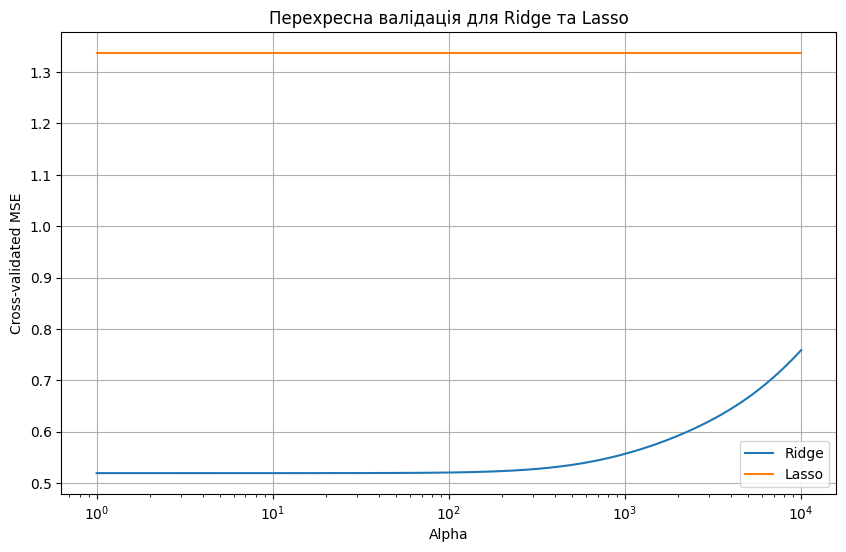

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Завантажуємо дані
california_data = fetch_california_housing()
X = california_data.data
y = california_data.target

# Розділяємо дані на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізуємо дані
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Функція для побудови та оцінки моделі
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return train_mse, test_mse, train_r2, test_r2, y_test_pred

# Базова модель (Лінійна регресія)
lr_model = LinearRegression()
train_mse, test_mse, train_r2, test_r2, _ = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

print(f"Базова модель (Лінійна регресія):")
print(f"Навчальні дані: MSE = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані: MSE = {test_mse:.2f}, R^2 = {test_r2:.2f}")

# Параметри для регуляризації
alphas = np.logspace(0, 4, 100)

# Функція для крос-валідації
def cross_validate_model(model_class, alphas, X_train, y_train):
    cv_scores = []
    for alpha in alphas:
        model = model_class(alpha=alpha)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_scores.append(-scores.mean())
    return cv_scores

# Крос-валідація для Ridge та Lasso
ridge_cv_scores = cross_validate_model(Ridge, alphas, X_train, y_train)
lasso_cv_scores = cross_validate_model(Lasso, alphas, X_train, y_train)

# Найкращі значення alpha
best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення alpha для Ridge: {best_ridge_alpha}")
print(f"Найкраще значення alpha для Lasso: {best_lasso_alpha}")

# Оцінка моделей з оптимальними параметрами
ridge_model = Ridge(alpha=best_ridge_alpha)
lasso_model = Lasso(alpha=best_lasso_alpha)

ridge_results = evaluate_model(ridge_model, X_train, y_train, X_test, y_test)
lasso_results = evaluate_model(lasso_model, X_train, y_train, X_test, y_test)

print(f"Ridge Regression: MSE = {ridge_results[1]:.2f}, R^2 = {ridge_results[3]:.2f}")
print(f"Lasso Regression: MSE = {lasso_results[1]:.2f}, R^2 = {lasso_results[3]:.2f}")

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Перехресна валідація для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

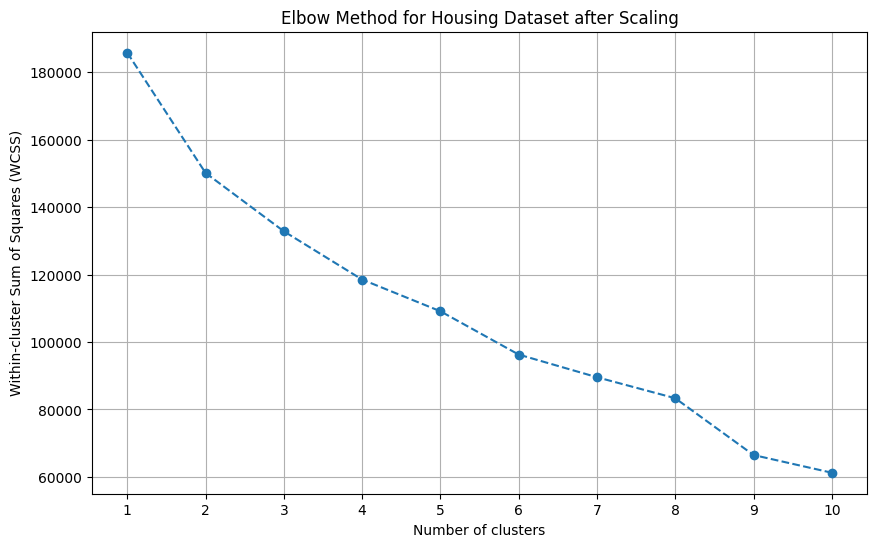

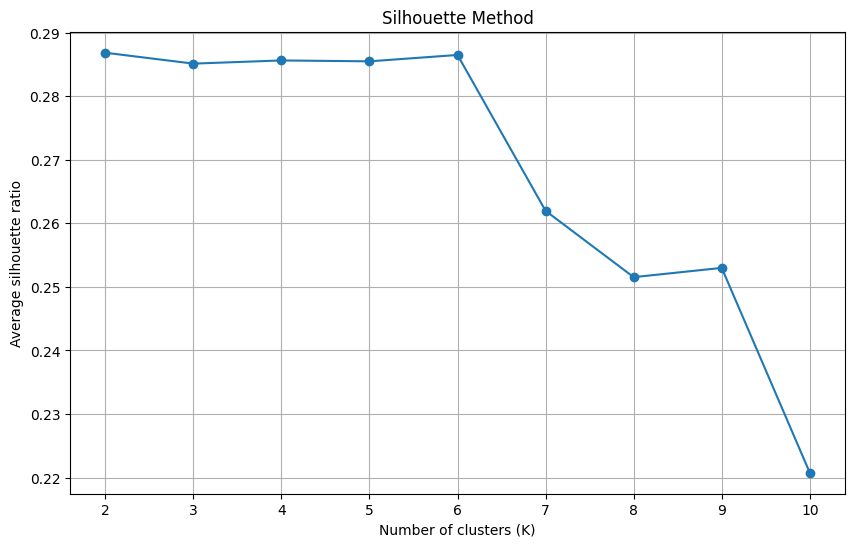

Оптимальна кількість кластерів: 2


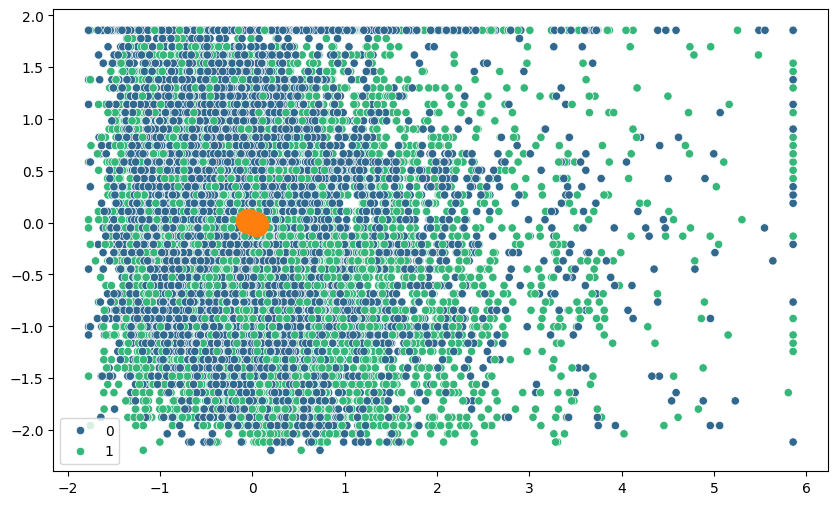

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Завантаження даних
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

# Нормалізація даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Функція для методу ліктя
def elbow_method(data, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Housing Dataset after Scaling')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster Sum of Squares (WCSS)')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()

# Виклик методу ліктя
elbow_method(data_scaled)

# Функція для методу силуетів
def silhouette_method(data, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Average silhouette ratio')
    plt.xticks(range(2, max_k + 1))
    plt.grid(True)
    plt.show()

    return silhouette_scores

# Виклик методу силуетів
silhouette_scores = silhouette_method(data_scaled)

# Знаходження оптимальної кількості кластерів
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Оптимальна кількість кластерів: {optimal_k}')

# Кластеризація з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300)
